In [1]:
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import mean_squared_error

import torch
from torch import nn
import torch.optim as optim

## FedSGD attempt

In [303]:
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler


diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

sc=StandardScaler()
X_transform=sc.fit_transform(X)

df = pd.DataFrame(X_transform)
df["y"] = diabetes.target

In [304]:
df.head()

,0,1,2,3,4,5,6,7,8,9,y
0,0.800500,1.065488,1.297088,0.459840,-0.929746,-0.732065,-0.912451,-0.054499,0.418551,-0.370989,151.0
1,-0.039567,-0.938537,-1.082180,-0.553511,-0.177624,-0.402886,1.564414,-0.830301,-1.436551,-1.938479,75.0
2,1.793307,1.065488,0.934533,-0.119218,-0.958674,-0.718897,-0.680245,-0.054499,0.060207,-0.545154,141.0
3,-1.872441,-0.938537,-0.243771,-0.770658,0.256292,0.525397,-0.757647,0.721302,0.477072,-0.196823,206.0
4,0.113172,-0.938537,-0.764944,0.459840,0.082726,0.327890,0.171178,-0.054499,-0.672582,-0.980568,135.0


In [4]:
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(len(X[0])+1, 1)
    return theta

In [5]:
def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables. 
    """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

     0         1         2         3         4         5         6         7  \
0  1.0  0.800500  1.065488  1.297088  0.459840 -0.929746 -0.732065 -0.912451   
1  1.0 -0.039567 -0.938537 -1.082180 -0.553511 -0.177624 -0.402886  1.564414   
2  1.0  1.793307  1.065488  0.934533 -0.119218 -0.958674 -0.718897 -0.680245   
3  1.0 -1.872441 -0.938537 -0.243771 -0.770658  0.256292  0.525397 -0.757647   
4  1.0  0.113172 -0.938537 -0.764944  0.459840  0.082726  0.327890  0.171178   

          8         9        10      y  
0 -0.054499  0.418551 -0.370989  151.0  
1 -0.830301 -1.436551 -1.938479   75.0  
2 -0.054499  0.060207 -0.545154  141.0  
3  0.721302  0.477072 -0.196823  206.0  
4 -0.054499 -0.672582 -0.980568  135.0  


Text(0, 0.5, 'Cost')

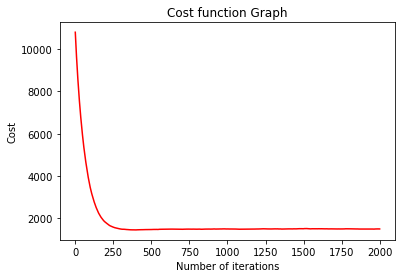

In [305]:
N = 8
S = 6
iterations = 2000
n_feat = 11
learning_rate = 0.03

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

sc=StandardScaler()
X_transform=sc.fit_transform(X)

y_new = np.reshape(y, (len(y), 1))   
cost_lst = []

vectorX = generateXvector(X_transform)
w_init = theta_init(X_transform)

df = pd.DataFrame(vectorX)
df["y"] = y

print(df.head())

shuffled = df.sample(frac=1)
data = np.array_split(shuffled, N) 

for i in range(len(data)):
    data[i] = (data[i][range(0,11)].to_numpy(),data[i]["y"].to_numpy())


m = len(X_transform)

w_model = w_init

#Iterations
for i in range(0,iterations):

    #Random selection of clients
    x = list(range(1,N))
    sel = random.sample(x,S)

    grad = [None]*S
    loc = 0
    
    #Clients iteration
    for j in sel:

        w_cli = w_model
    
        gradients = 2/m * vectorX.T.dot(vectorX.dot(w_model) - y_new)
        grad[loc] = 2/m * data[j][0].T.dot(data[j][0].dot(w_model) - data[j][1].reshape(len(data[j][1]),1))
        loc +=1
    
    g = np.stack(grad, axis=0)
    grad_mean = g.mean(axis = 0)

    
    w_model = w_model  - learning_rate*grad_mean
    
    y_pred = vectorX.dot(w_model)
    cost_value = 1/(2*len(y))*((y_pred - y)**2) 
            #Calculate the loss for each training instance
    total = 0
    for i in range(len(y)):
        total += cost_value[i][0] 
        #Calculate the cost function for each iteration
    cost_lst.append(total)
    
    #grads = np.stack(grads)
    #mean_grads = np.average(grads, axis=0)
    #print(w_model)

    
    
plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')


In [306]:
w_init

array([[ 1.79698202],
       [-0.8194185 ],
       [-0.32083269],
       [ 0.89572974],
       [ 0.26830843],
       [-1.88000688],
       [-0.63603857],
       [-1.07824026],
       [-1.2959321 ],
       [ 1.3247733 ],
       [ 1.64815205]])

## Toy data test

Text(0, 0.5, 'Cost')

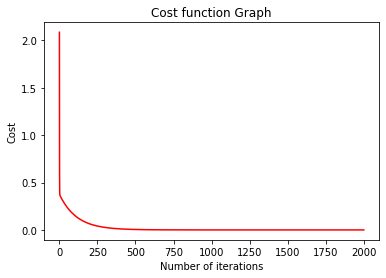

In [308]:
x = [np.random.randint(1,10) for i in range(0,300)]
y = [n*2 for n in x]
x = np.array(x).reshape(300,1)
y = np.array(y).reshape(300,1)



N = 8
S = 6
iterations = 2000

n_feat = 2
learning_rate = 0.01

y_new = np.reshape(y, (len(y), 1))   
cost_lst = []

vectorX = generateXvector(x)
w_init = theta_init(x)

df = pd.DataFrame(vectorX)
df["y"] = y

shuffled = df.sample(frac=1)
data = np.array_split(shuffled, N) 

for i in range(len(data)):
    data[i] = (data[i][range(0,n_feat)].to_numpy(),data[i]["y"].to_numpy())


m = len(vectorX)

w_model = w_init

#Iterations
for i in range(0,iterations):

    #Random selection of clients
    a = list(range(1,N))
    sel = random.sample(a,S)

    grad = [None]*S
    loc = 0
    
    #Clients iteration
    for j in sel:
        
        w_cli = w_model

        
        gradients = 2/m * vectorX.T.dot(vectorX.dot(w_model) - y_new)
        

        grad[loc] = 2/len(data[j][0]) * data[j][0].T.dot(data[j][0].dot(w_model) - data[j][1].reshape(len(data[j][1]),1))
        
        loc +=1

    g = np.stack(grad, axis=0)
    grad_mean = g.mean(axis = 0)

    
    w_model = w_model  - learning_rate*grad_mean
    
    
    y_pred = vectorX.dot(w_model)
    cost_value = 1/(len(y))*((y_pred - y)**2) 
            #Calculate the loss for each training instance
    total = 0
    for i in range(len(y)):
        total += cost_value[i][0] 
        #Calculate the cost function for each iteration
    cost_lst.append(total)
    
    #grads = np.stack(grads)
    #mean_grads = np.average(grads, axis=0)
    #print(w_model)

    
    
plt.plot(np.arange(1,iterations),cost_lst[1:], color = 'red')
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')


In [309]:
w_model

array([[1.75848218e-04],
       [1.99997218e+00]])

## FedAvg implementation 

In [257]:
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(len(X[0])+1, 1)
    return theta

def generateXvector(X):
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables. 
    """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

In [256]:
def federated_sgd(data, iterations, N, S, n_feature, learning_rate,w_model):
    cost_lst = []
    for i in range(0,iterations):
        #Random selection of clients
        a = list(range(1,N))
        sel = random.sample(a,S)

        grad = [None]*S
        loc = 0

        #Clients iteration
        for j in sel:

            w_cli = w_model

            
            #Gone repla
            grad[loc] = 2/len(data[j][0]) * data[j][0].T.dot(data[j][0].dot(w_cli) - data[j][1].reshape(len(data[j][1]),1))

            loc +=1

        g = np.stack(grad, axis=0)
        #Plot over iterations
        grad_mean = g.mean(axis = 0)
        
        
        #Pytorch function 
        w_model = w_model  - learning_rate*grad_mean
        
        y_pred = vectorX.dot(w_model)
        cost_value = 1/(len(y))*((y_pred - y)**2) 
                #Calculate the loss for each training instance
        total = 0
        for i in range(len(y)):
            total += cost_value[i][0] 
            #Calculate the cost function for each iteration
        cost_lst.append(total)
    return w_model, cost_lst


####  All clients same alpha

Text(0, 0.5, 'Cost')

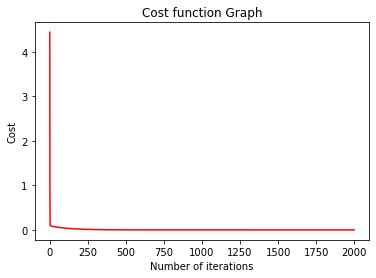

In [312]:
x = [np.random.randint(1,10) for i in range(0,300)]
y = [n*4 for n in x]
x = np.array(x).reshape(300,1)
y = np.array(y).reshape(300,1)


#Parameters of the model
N = 8
S = 6
iterations = 2000
n_feat = 2 #number of feature plus one for intercept
learning_rate = 0.01

######Data preprocessing

#Add intercept in training data 
vectorX = generateXvector(x)

df = pd.DataFrame(vectorX)
df["y"] = y

shuffled = df.sample(frac=1)
data = np.array_split(shuffled, N) 

#Create the clients
for i in range(len(data)):
    #Normalize all instead intercept
    #data[i][1] = (data[i][1]-data[i][1].mean())/data[i][1].std()
    #data[i]["y"] = (data[i]["y"]-data[i]["y"].mean())/data[i]["y"].std()
    
    data[i] = (data[i][range(0,n_feat)].to_numpy(),data[i]["y"].to_numpy())


w_model = theta_init(x)
    
output, costs = federated_sgd(data, iterations, N, S, n_feat, learning_rate,w_model)


plt.plot(np.arange(1,iterations),costs[1:], color = 'red')
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')


In [313]:
output

array([[1.41241303e-04],
       [3.99997757e+00]])

#### Two different alphas 

[[0.42626886]
 [3.44907399]]


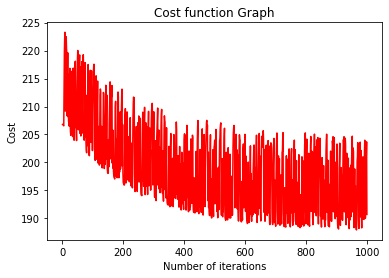

In [302]:
x_1 = [np.random.randint(1,10) for i in range(0,300)]
y_1 = [n*6 for n in x_1]
x_1 = np.array(x_1).reshape(300,1)
y_1 = np.array(y_1).reshape(300,1)

x_2= [np.random.randint(1,10) for i in range(0,300)]
y_2 = [n*2 for n in x_2]
x_2 = np.array(x_2).reshape(300,1)
y_2 = np.array(y_2).reshape(300,1)

#Parameters of the model
N = 8
S = 6
iterations = 1000
n_feat = 2 #number of feature plus one for intercept
learning_rate = 0.01

######Data preprocessing

#Add intercept in training data 
vectorX = generateXvector(x_1)
vectorX2 = generateXvector(x_2)

df = pd.DataFrame(vectorX)
df["y"] = y_1

df2 = pd.DataFrame(vectorX2)
df2["y"] = y_2

shuffled = df.sample(frac=1)
data = np.array_split(shuffled, N/2) 


shuffled2 = df2.sample(frac=1)
data2 = np.array_split(shuffled2, N/2) 

#Create the clients
for i in range(len(data)):
    #Normalize all instead intercept
    #data[i][1] = (data[i][1]-data[i][1].mean())/data[i][1].std()
    #data[i]["y"] = (data[i]["y"]-data[i]["y"].mean())/data[i]["y"].std()
    
    #Convert to numpy
    data[i] = (data[i][range(0,n_feat)].to_numpy(),data[i]["y"].to_numpy())

#Create the clients
for i in range(len(data2)):
    #Normalize all instead intercept
    #data2[i][1] = (data2[i][1]-data2[i][1].mean())/data2[i][1].std()
    #data2[i]["y"] = (data2[i]["y"]-data2[i]["y"].mean())/data2[i]["y"].std()
    
    #Convert to numpy
    data2[i] = (data2[i][range(0,n_feat)].to_numpy(),data2[i]["y"].to_numpy())

data = data + data2

w_model = theta_init(x)
    
output, costs = federated_sgd(data, iterations, N, S, n_feat, learning_rate,w_model)


plt.plot(np.arange(1,iterations),costs[1:], color = 'red')
plt.title('Cost function Graph')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')

print(output)

In [300]:
type(data[1])

tuple

## Using pytorch

In [21]:
error = 0.1
n = 100 
a = 3
b = 1

# Data
x = torch.randn(n, 1)

t = a * x +  b

model_server = nn.Linear(1, 1)
optimizer_server = optim.Adam(model_server.parameters())
loss_fn = nn.MSELoss()

# Run training
niter = 10000
for _ in range(0, niter):
    optimizer_server.zero_grad()
    predictions = model_server(x)
    loss = loss_fn(predictions, t)
    loss.backward()
    optimizer_server.step()

    
print("-" * 10)
print("learned a = {}".format(list(model_server.parameters())[0].data[0, 0]))
print("learned b = {}".format(list(model_server.parameters())[1].data[0]))

----------
learned a = 2.9999964237213135
learned b = 1.000000238418579


In [234]:
#Number of iterations
iterations = 15000

#Toy data parameters
n = 300 
a = 7
b = 1
N = 6
S = 4

# Data
x = torch.randn(n, 1)
t = a * x +  b

#Create N clients
d = []
for i in range(1,N+1):
    d.append((x,t))

    
#Definition of the server model
model_server = nn.Linear(1, 1)
optimizer_server = optim.Adam(model_server.parameters())
loss_fn = nn.MSELoss()


#One model per clients
models = [None]*len(d)
opti = [None]*len(d)
loss_fct = [None]*len(d)

for i in range(len(models)):
    models[i] = nn.Linear(1, 1)
    opti[i] = optim.Adam(models[i].parameters())
    loss_fct[i] = nn.MSELoss()



grad_mean_hist = []

#Iterations
for i in range(0,iterations):

    #Random selection of clients
    a = list(range(1,N))
    sel = random.sample(a,S)

    grad = []
    bias = []
    loc = 0

    loss = [None]*N
    losses = 0
    
    #Clients iteration
    for j in sel:

        
        opti[loc].zero_grad()
        models[loc].weight = model_server.weight
        models[loc].weight.grad = None
        models[loc].bias = model_server.bias
        models[loc].bias.grad = None

        predictions = models[loc](d[0][0])
        
        loss[loc] = loss_fct[loc](predictions, d[0][1])
        loss[loc].backward()
        
        grad.append(models[loc].weight.grad.numpy())
        bias.append(models[loc].bias.grad.numpy())
        loc+=1
        

    grad_mean = torch.FloatTensor([[np.mean(grad)]])
    grad_mean_hist.append(grad_mean)

    bias_mean = torch.FloatTensor([np.mean(bias)])
    model_server.weight.grad = grad_mean
    model_server.bias.grad = bias_mean
    g.append(list(model_server.parameters())[0].data[0, 0])
    optimizer_server.step()



In [235]:
print("-" * 10)
print("learned a = {}".format(list(model_server.parameters())[0].data[0, 0]))
print("learned b = {}".format(list(model_server.parameters())[1].data[0]))

----------
learned a = 6.999982833862305
learned b = 0.9999986886978149


C:\Users\Kirsch\AppData\Local\Temp/ipykernel_9084/930740421.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  plt.plot(range(0,len(grad_mean_hist)), np.abs(grad_mean_hist))
C:\Users\Kirsch\AppData\Local\Temp/ipykernel_9084/930740421.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(range(0,len(grad_mean_hist)), np.abs(grad_mean_hist))


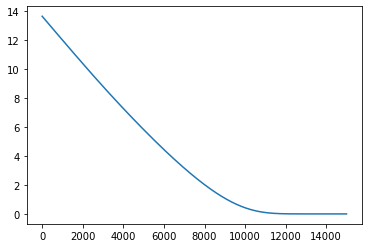

In [236]:
plt.plot(range(0,len(grad_mean_hist)), np.abs(grad_mean_hist))


### Function definition with PyTorch 

In [415]:
def fed_sgd(data, iterations, N, S, n_feat):
    
    grad_mean_hist = []
    
    #Definition of the server model
    model_server = nn.Linear(n_feat, 1)
    optimizer_server = optim.Adam(model_server.parameters())
    loss_fn = nn.MSELoss()


    #One model per clients
    models = [None]*N
    opti = [None]*N
    loss_fct = [None]*N

    for i in range(len(models)):
        models[i] = nn.Linear(n_feat, 1)
        opti[i] = optim.Adam(models[i].parameters())
        loss_fct[i] = nn.MSELoss()

        
    #Iterations
    for i in range(0,iterations):

        #Random selection of clients
        a = list(range(0,N))
        sel = random.sample(a,S)

        grad = []
        bias = []
        loc = 0

        loss = [None]*N
        losses = 0

        #Clients iteration
        for j in sel:
            opti[loc].zero_grad()
            models[loc].weight = model_server.weight
            models[loc].weight.grad = None
            models[loc].bias = model_server.bias
            models[loc].bias.grad = None

            predictions = models[loc](data[j][0])

            loss[loc] = loss_fct[loc](predictions, data[j][1])
            loss[loc].backward()

            grad.append(models[loc].weight.grad.numpy())
            bias.append(models[loc].bias.grad.numpy())
            loc+=1
        grad = np.stack(grad, axis=0)
        grad_mean = torch.FloatTensor(grad.mean(axis = 0))
        
        grad_mean_hist.append(grad_mean)
        

        bias_mean = torch.FloatTensor([np.mean(bias)])
        model_server.weight.grad = grad_mean
        model_server.bias.grad = bias_mean
        optimizer_server.step()
        torch.nn.utils.clip_grad_norm_(parameters=model_server.parameters(), max_norm=10, norm_type=2.0)
    return model_server, grad_mean_hist


In [416]:
#Number of iterations
iterations = 15000

#Toy data parameters
n = 300 
a = 7
b = 1
n_feat = 1

#Client spec
N = 6
S = 4

# Data
x = torch.randn(n, 1)
t = a * x +  b

#Create N clients
d = []
for i in range(1,N+1):
    d.append((x,t))
    
out_model, hist = fed_sgd(d, iterations, N, S, n_feat)

print("learned a = {}".format(list(out_model.parameters())[0].data[0, 0]))
print("learned b = {}".format(list(out_model.parameters())[1].data[0]))



learned a = 6.999981880187988
learned b = 1.0000003576278687


C:\Users\Kirsch\AppData\Local\Temp/ipykernel_9084/2280684675.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  plt.plot(range(0,len(hist)), np.abs(hist))
C:\Users\Kirsch\AppData\Local\Temp/ipykernel_9084/2280684675.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(range(0,len(hist)), np.abs(hist))


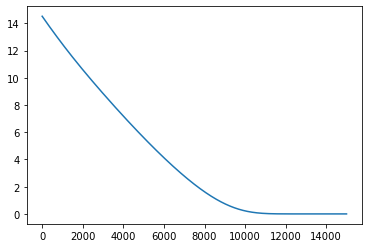

In [322]:
plt.plot(range(0,len(hist)), np.abs(hist))


In [226]:
len(hist)

31500

### Test with two alphas 

In [263]:
#Number of iterations
iterations = 15000

#Toy data parameters
n = 300 
a = 4
b = 1
c = 2
d = 3
n_feat = 1

#Client spec
N = 8
S = 4

# Data
x = torch.randn(n, 1)
t = a * x +  b
u = c * x + d
#Create N clients
d = []

for i in range(1,int(N/2)+1):
    d.append((x,t))
    
    
for i in range(1,int(N/2)+1):
    d.append((x,u))

    
out_model, hist = fed_sgd(d, iterations, N, S, n_feat)

print("learned a = {}".format(list(out_model.parameters())[0].data[0, 0]))
print("learned b = {}".format(list(out_model.parameters())[1].data[0]))



learned a = 2.986762523651123
learned b = 2.0132389068603516


C:\Users\Kirsch\AppData\Local\Temp/ipykernel_9084/924818254.py:1: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  plt.plot(range(0,len(hist)), np.abs(hist))
C:\Users\Kirsch\AppData\Local\Temp/ipykernel_9084/924818254.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plt.plot(range(0,len(hist)), np.abs(hist))


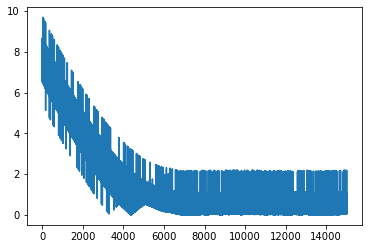

In [266]:
plt.plot(range(0,len(hist)), np.abs(hist))


### Test with several features

Next steps - more specificity in dataset selection (use sel var)

All in a function

In [ ]:
iteration = 10000  

n = 300 
alpha = 2
beta = 2
teta = 1

n_feat = 2

#Client spec
N = 8
S = 4

x = torch.randn(n, 2)
y = []
for i in range(len(x)):
    y.append(x[i][0]*alpha + x[i][1]*beta)
    
y = torch.FloatTensor(y)
y = y.reshape(300,1)

#Create N clients
d = []

for i in range(0,N):
    d.append((x,y))
    
out_model, hist = fed_sgd(d, iterations, N, S, n_feat)


In [328]:
print("learned a = {}".format(list(out_model.parameters())[0].data[0, 0]))
print("learned b = {}".format(list(out_model.parameters())[1].data[0]))


learned a = 2.0
learned b = 8.234829484976558e-11


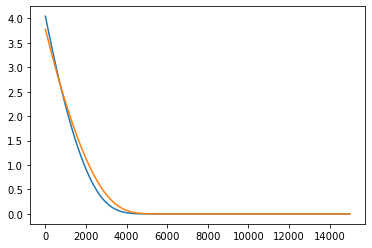

In [340]:
al = np.stack(hist, axis=0)[:,0][:,0]
bet = np.stack(hist, axis=0)[:,0][:,1]

plt.plot(range(0,len(al)), np.abs(al))
plt.plot(range(0,len(al)), np.abs(bet))



### Non-linear FedSGD

In [202]:
#Create toy data from arbitrary model (see if the fed non linear reaches theses weights again)


       
mod = NeuralNetwork(input_dim, hidden_dim, output_dim)

layer_1_w = mod.layer_1.weight
#layer_2_w = mod.layer_2.weight

x = torch.randn(10000, input_dim)

y = mod(x) + (0.1**0.5)*torch.randn(10000,1)

print(layer_1_w)
#print(mod.layer_1.weight)
y

Parameter containing:
tensor([[-0.0708,  0.0929],
        [ 0.0911,  0.6820],
        [ 0.0302,  0.4896],
        [ 0.3683, -0.4249]], requires_grad=True)


tensor([[0.6321],
        [0.5548],
        [0.2595],
        ...,
        [0.5219],
        [0.1046],
        [0.7204]], grad_fn=<AddBackward0>)

In [203]:

loss_fn = nn.MSELoss()


num_epochs = 10000
loss_values = []

model = NeuralNetwork(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters())

losses = []

#model.layer_1.weight = layer_1_w
#model.layer_1.bias = mod.layer_1.bias

#model.layer_2.weight = layer_2_w
#model.layer_2.bias = mod.layer_2.bias

for epoch in range(num_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    pred = model(x)
    
    loss = loss_fn(pred, y.data)
    #loss_values.append(loss.item())
    
    losses.append(loss.item())
    loss.backward()

    
    optimizer.step()

print("Training Complete")


print(model.layer_1.weight)
#print(model.layer_2.weight)



Training Complete
Parameter containing:
tensor([[-0.1133,  0.0286],
        [ 0.0493, -0.1483],
        [-0.0510, -0.4710],
        [ 0.0905, -0.4750]], requires_grad=True)


In [204]:
x_test = torch.randn(1000, input_dim)

y_test = mod(x)

y_pred = model(x)

loss_fn(y_pred,y_test)

tensor(0.0002, grad_fn=<MseLossBackward0>)

In [252]:
#Number of clients
N = 25
S = 3
n_feat = 2

#Create toy data from arbitrary model (see if the fed non linear reaches theses weights again)
input_dim = 2
hidden_dim = 10
output_dim = 1

mod = NeuralNetwork(input_dim, hidden_dim, output_dim)


layer_1_w = mod.layer_1.weight
layer_2_w = mod.layer_2.weight

x = torch.randn(1000, 2)

y = mod(x) + (0.1**0.5)*torch.randn(1000,1)
#Create N clients
d = []

for i in range(0,N):
    d.append((x,y))


iteration = 10000

out_mod, loss, mod_test, hist= fed_sgd_nn(d, iteration, N, S, n_feat)

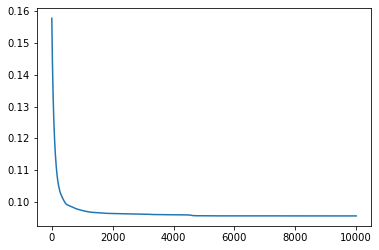

In [253]:
loss

a = [np.mean(loss[i]) for i in range(len(loss))]

plt.plot(a)

In [254]:
print(layer_1_w)
print(out_mod.layer_1.weight)

Parameter containing:
tensor([[ 0.5441, -0.4695],
        [-0.6912,  0.6151],
        [-0.4545,  0.5696],
        [-0.6768, -0.5323],
        [ 0.6289,  0.4569],
        [ 0.5257, -0.5592],
        [-0.4697, -0.0510],
        [ 0.4751, -0.1097],
        [-0.4334, -0.0294],
        [-0.5684, -0.3451]], requires_grad=True)
Parameter containing:
tensor([[ 0.3431, -0.0106],
        [-0.4086,  0.1000],
        [ 0.7570,  0.2463],
        [-0.5171,  0.5699],
        [-0.3359,  0.2825],
        [-0.7148, -0.2972],
        [ 0.2489,  0.7292],
        [ 0.6740, -0.6551],
        [-0.7724, -1.0396],
        [-0.6338, -0.6685]], requires_grad=True)


In [255]:
x_test = torch.randn(1000, input_dim)

y_test = mod(x)

y_pred = out_mod(x)

loss_fn(y_pred,y_test)

tensor(0.0035, grad_fn=<MseLossBackward0>)

In [257]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(NeuralNetwork, self).__init__()
        self.layer_1 = nn.Linear(input_dim, hidden_dim)
        
        self.layer_2 = nn.Linear(hidden_dim, output_dim)
       
    def forward(self, x):
        x = torch.nn.functional.relu(self.layer_1(x))
        x = self.layer_2(x)
        return x

    

def fed_sgd_nn(data, iterations, N, S, n_feat, hidden_dim):
    
    grad_mean_hist = [None]*iterations
    
    #Definition of the server model
    model_server = NeuralNetwork(n_feat, hidden_dim, 1)
    optimizer_server = optim.Adam(model_server.parameters())
    loss_fn = nn.MSELoss()

    
    #One model per clients
    models = [None]*S
    opti = [None]*S
    loss_fct = [None]*S

    for i in range(len(models)):
        models[i] = NeuralNetwork(n_feat, hidden_dim, 1)
        
        opti[i] = optim.Adam(models[i].parameters())
        loss_fct[i] = nn.MSELoss()

    mse = []    
    #Iterations
    for i in range(0,iterations):


        
        #Random selection of clients
        a = list(range(0,N))
        sel = random.sample(a,S)
        
        
        grad_l1 = []
        bias_l1 = []
        
        
        grad_l2 = []
        bias_l2 = []
        
        loc = 0

        loss = [None]*S
        

        #Clients iteration
        for j in sel:
            #First layer
            
            models[loc].layer_1.weight = model_server.layer_1.weight
            
            #print(models[loc].layer_1.weight)
            models[loc].layer_1.weight.grad = None
            models[loc].layer_1.bias = model_server.layer_1.bias
            models[loc].layer_1.bias.grad = None
            
            opti[loc].zero_grad()
            
            #print(models[loc].layer_1.bias)
            
            #Second layer
            
            models[loc].layer_2.weight = model_server.layer_2.weight
            models[loc].layer_2.weight.grad = None
            models[loc].layer_2.bias = model_server.layer_2.bias
            models[loc].layer_2.bias.grad = None

            predictions = models[loc](data[j][0])
            

            
            loss[loc] = loss_fct[loc](predictions, data[j][1])
            
            #print(loss[loc])
            
            loss[loc].backward(retain_graph = True)
            
            
            loss[loc] = loss[loc].item()
            #print(models[loc].layer_1.weight.grad)

            grad_l1.append(models[loc].layer_1.weight.grad.numpy())
            bias_l1.append(models[loc].layer_1.bias.grad.numpy())
            

            
            grad_l2.append(models[loc].layer_2.weight.grad.numpy())
            bias_l2.append(models[loc].layer_2.bias.grad.numpy())
            
            loc+=1
        
        #print(grad_l1)
        mse.append((loss))
        grad_l1 = np.stack(grad_l1, axis=0)

        grad_l2 = np.stack(grad_l2, axis=0)
        
        grad_mean_l1 = torch.FloatTensor(grad_l1.mean(axis = 0))
        

        
        grad_mean_l2 = torch.FloatTensor(grad_l2.mean(axis = 0))
        #print(grad_mean_l1)
        grad_mean_hist[i] = grad_mean_l1
        #print("errr")
        #print(grad_mean_hist)
        
        bias_l1 = np.stack(bias_l1, axis = 0)
        bias_mean_l1 = torch.FloatTensor(bias_l1.mean(axis = 0))
        bias_mean_l2 = torch.FloatTensor([np.mean(bias_l2)])
        
        
        model_server.layer_1.weight.grad = grad_mean_l1
        #print(model_server.layer_1.weight.grad)
        model_server.layer_2.weight.grad = grad_mean_l2

        model_server.layer_1.bias.grad = bias_mean_l1
        model_server.layer_2.bias.grad = bias_mean_l2
        
        optimizer_server.step()
    return model_server, mse, grad_mean_hist